In [1]:
# imports 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Using lemonade.csv dataset and focusing on continuous variables:

In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.shape

(365, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [7]:
def get_lower_and_upper_bounds(col, multiplier=1.5):
    q1, q3 = col.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + multiplier * iqr
    lower_bound = q1 - multiplier * iqr
    return upper_bound, lower_bound
    
    

In [8]:
def get_outliers(df, bound, multiplier =1.5):
    for col in df.select_dtypes(exclude='O').drop(columns="Price"):
        print(col)
        upper_bound, lower_bound = get_lower_and_upper_bounds(df[col], multiplier)
        #print(upper_bound, lower_bound)
        outliers =[]
        if bound == 'lower_bound':
            for x in df[col]:
                if x < lower_bound:
                    outliers.append(x)
            print(outliers)
        else:
            for x in df[col]:
                if x > upper_bound:
                    outliers.append(x)
            print(outliers)



####  Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [9]:
for col in df.select_dtypes(exclude='O').drop(columns="Price"):
    print(col)
    lower_outliers =[]
    upper_bound, lower_bound = get_lower_and_upper_bounds(df[col], multiplier=1.5)
    for x in df[col]:
        if x < lower_bound:
            lower_outliers.append(x)
    print(lower_outliers)   

Temperature
[15.1]
Rainfall
[]
Flyers
[-38]
Sales
[]


In [10]:
get_outliers(df, 'lower_bound' )

Temperature
[15.1]
Rainfall
[]
Flyers
[-38]
Sales
[]


- remove Flyers outliers: -38, cannot have negative value on flyers


#### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [11]:
for col in df.select_dtypes(exclude='O').drop(columns="Price"):
    print(col)
    upper_outliers =[]
    upper_bound, lower_bound = get_lower_and_upper_bounds(df[col], multiplier=1.5)

    for x in df[col]:
        if x > upper_bound:
            upper_outliers.append(x)
    print(upper_outliers)


Temperature
[212.0]
Rainfall
[2.0, 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43, 1.54, 1.33, 1.33, 1.54, 1.82, 1.43, 1.82, 1.33, 1.43, 1.54, 1.33, 1.43, 1.33, 1.54, 1.43, 1.43, 2.5]
Flyers
[77, 80]
Sales
[143, 158, 235, 534]


In [12]:
get_outliers(df, 'upper_bound' )

Temperature
[212.0]
Rainfall
[2.0, 1.33, 1.33, 1.54, 1.54, 1.54, 1.33, 1.33, 1.67, 1.43, 1.43, 1.54, 1.33, 1.33, 1.54, 1.82, 1.43, 1.82, 1.33, 1.43, 1.54, 1.33, 1.43, 1.33, 1.54, 1.43, 1.43, 2.5]
Flyers
[77, 80]
Sales
[143, 158, 235, 534]


- remove Temperature outliers: 212, cannot have high temperature



#### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [13]:
get_outliers(df, 'lower_bound', 3 )

Temperature
[]
Rainfall
[]
Flyers
[-38]
Sales
[]


- remove flyers outliers: -38, cannot have negative value on flyers


#### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [14]:
get_outliers(df, 'upper_bound', 3 )

Temperature
[212.0]
Rainfall
[2.0, 1.82, 1.82, 2.5]
Flyers
[]
Sales
[143, 158, 235, 534]


- remove Temperature outliers: 212, cannot have that high temperature
- remove Sales outliers: cannot have that high sales in accordance with average sale of 27.86


### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

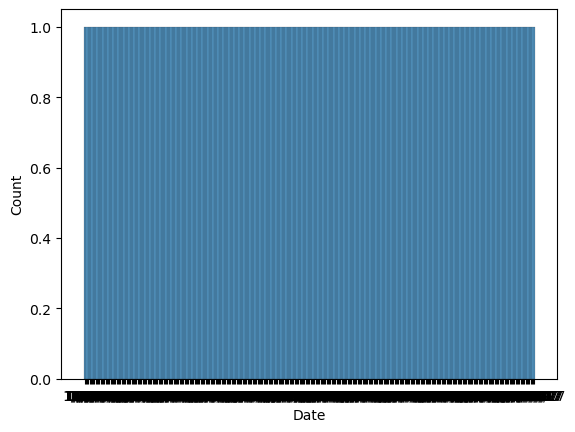

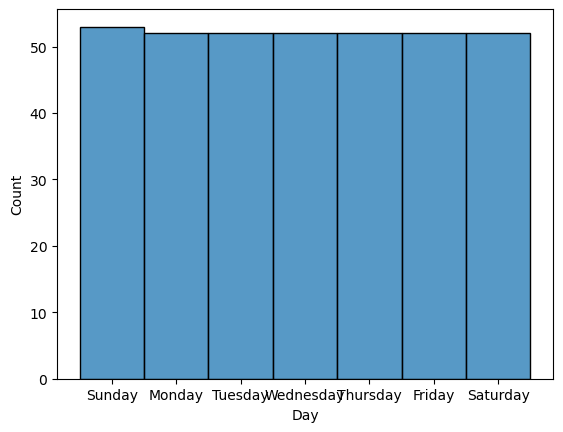

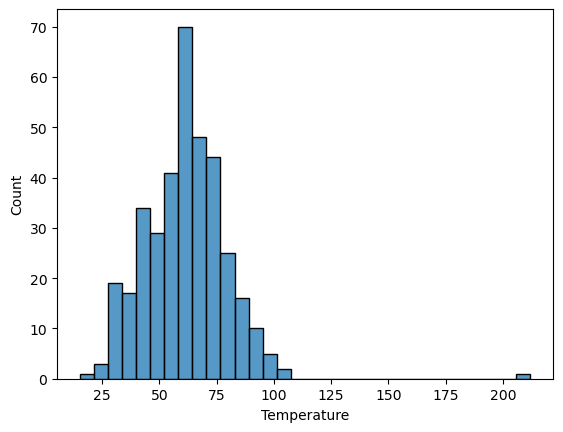

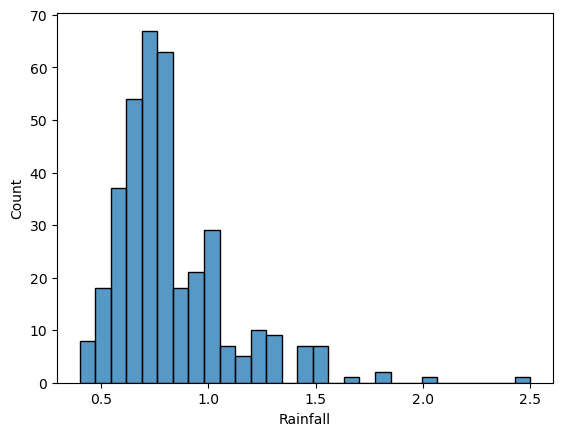

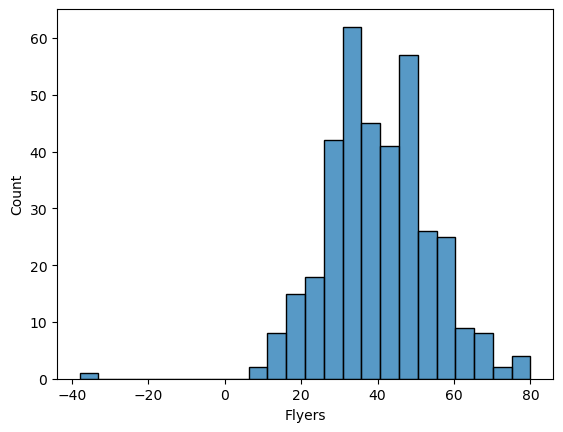

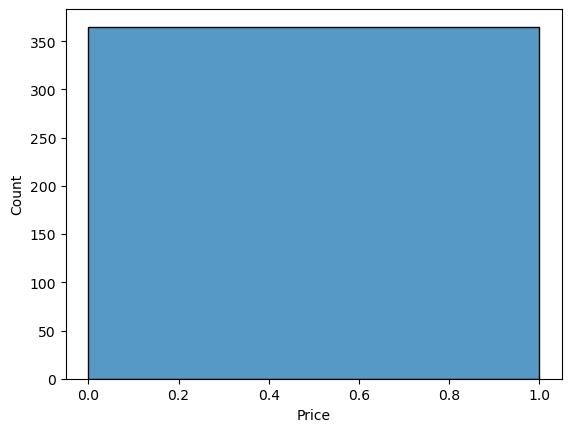

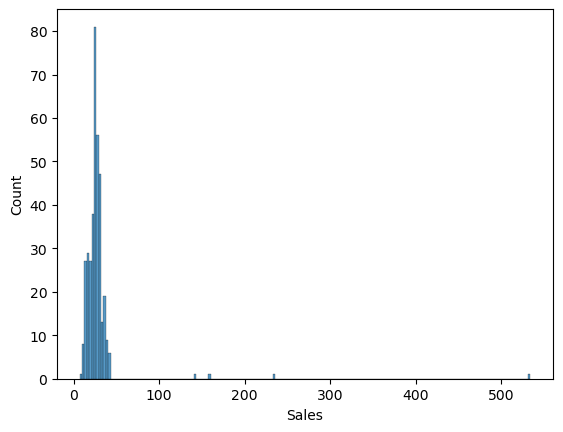

In [15]:
for col in df: 
    sns.histplot(df[col])
    plt.show()

#### Use a 2 sigma decision rule to isolate the outliers.

In [16]:
for col in df.select_dtypes(exclude='O').drop(columns="Price"):
    print(col)
    std = df[col].std()
    mean = df[col].mean()
    outliers = []
    for x in df[col]: 
        if (x < mean - 2* std) or (x > mean +2 * std): 
            outliers.append(x)
    print(outliers)

Temperature
[212.0, 99.3, 102.6, 102.9, 98.0, 99.3, 99.6, 97.9, 22.0, 15.1]
Rainfall
[2.0, 1.54, 1.54, 1.54, 1.67, 1.43, 1.43, 1.54, 1.54, 1.82, 1.43, 1.82, 1.43, 1.54, 1.43, 1.54, 1.43, 1.43, 2.5]
Flyers
[77, 70, 76, 68, 68, 80, 76, 72, 69, 74, -38, 11, 9]
Sales
[143, 158, 235, 534]


### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [17]:
for col in df.select_dtypes(exclude='O').drop(columns="Price"):
    print(col)
    std = df[col].std()
    mean = df[col].mean()
    outliers = []
    for x in df[col]: 
        if (x < mean - 3 * std) or (x > mean + 3 * std): 
            outliers.append(x)
    print(outliers)

Temperature
[212.0]
Rainfall
[2.0, 1.67, 1.82, 1.82, 2.5]
Flyers
[-38]
Sales
[143, 158, 235, 534]
